In [147]:
# Import Libraries
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tqdm import tqdm_notebook
import plotly.figure_factory as ff

import numpy as np # linear algebra
import pandas as pd # data processing

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline


In [148]:
data=pd.read_csv("water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# EDA

* ph-> pH of water
* Hardness-> Capacity of water to precipitate soap in mg/L
* Solids-> Total dissolved solids in ppm
* Chloramines-> Amount of Chloramines in ppm
* Sulfate-> Amount of Sulfates dissolved in mg/L
* Conductivity-> Electrical conductivity of water in μS/cm
* Organic_carbon-> Amount of organic carbon in ppm
* Trihalomethanes-> Amount of Trihalomethanes in μg/L
* Turbidity-> Measure of light emiting property of water in NTU (Nephelometric Turbidity Units)
* Potability-> Indicates if water is safe for human consumption

In [149]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [151]:
print('There are {} data points and {} features in the data'.format(data.shape[0],data.shape[1]))

There are 3276 data points and 10 features in the data


## Null Values

<AxesSubplot:>

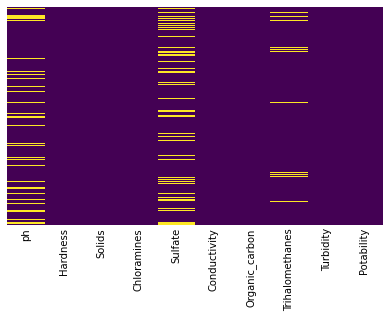

In [152]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [153]:
for i in data.columns:
    if data[i].isnull().sum()>0:
        print("There are {} null values in {} column".format(data[i].isnull().sum(),i))

There are 491 null values in ph column
There are 781 null values in Sulfate column
There are 162 null values in Trihalomethanes column


## Handling Null Values

### PH

In [154]:
data['ph'].describe()

count    2785.000000
mean        7.080795
std         1.594320
min         0.000000
25%         6.093092
50%         7.036752
75%         8.062066
max        14.000000
Name: ph, dtype: float64

Filling the missing values by mean

In [155]:
data['ph_mean']=data['ph'].fillna(data['ph'].mean())

In [156]:
data['ph_mean'].isnull().sum()

0

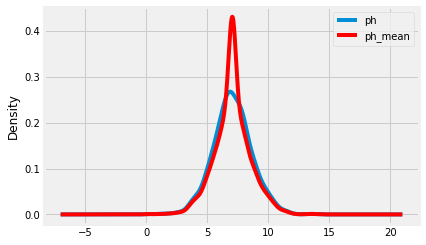

In [157]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['ph'].plot(kind='kde', ax=ax)
data.ph_mean.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

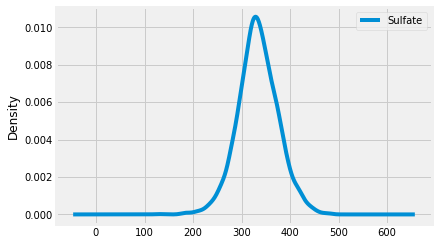

In [158]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['Sulfate'].plot(kind='kde', ax=ax)
#data.ph_mean.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

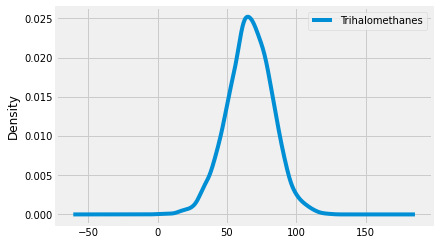

In [159]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['Trihalomethanes'].plot(kind='kde', ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [160]:
data=data.drop(['ph','Sulfate','Trihalomethanes','ph_mean'],axis=1)

In [161]:
data.isnull().sum()

Hardness          0
Solids            0
Chloramines       0
Conductivity      0
Organic_carbon    0
Turbidity         0
Potability        0
dtype: int64

## Check for Correlation

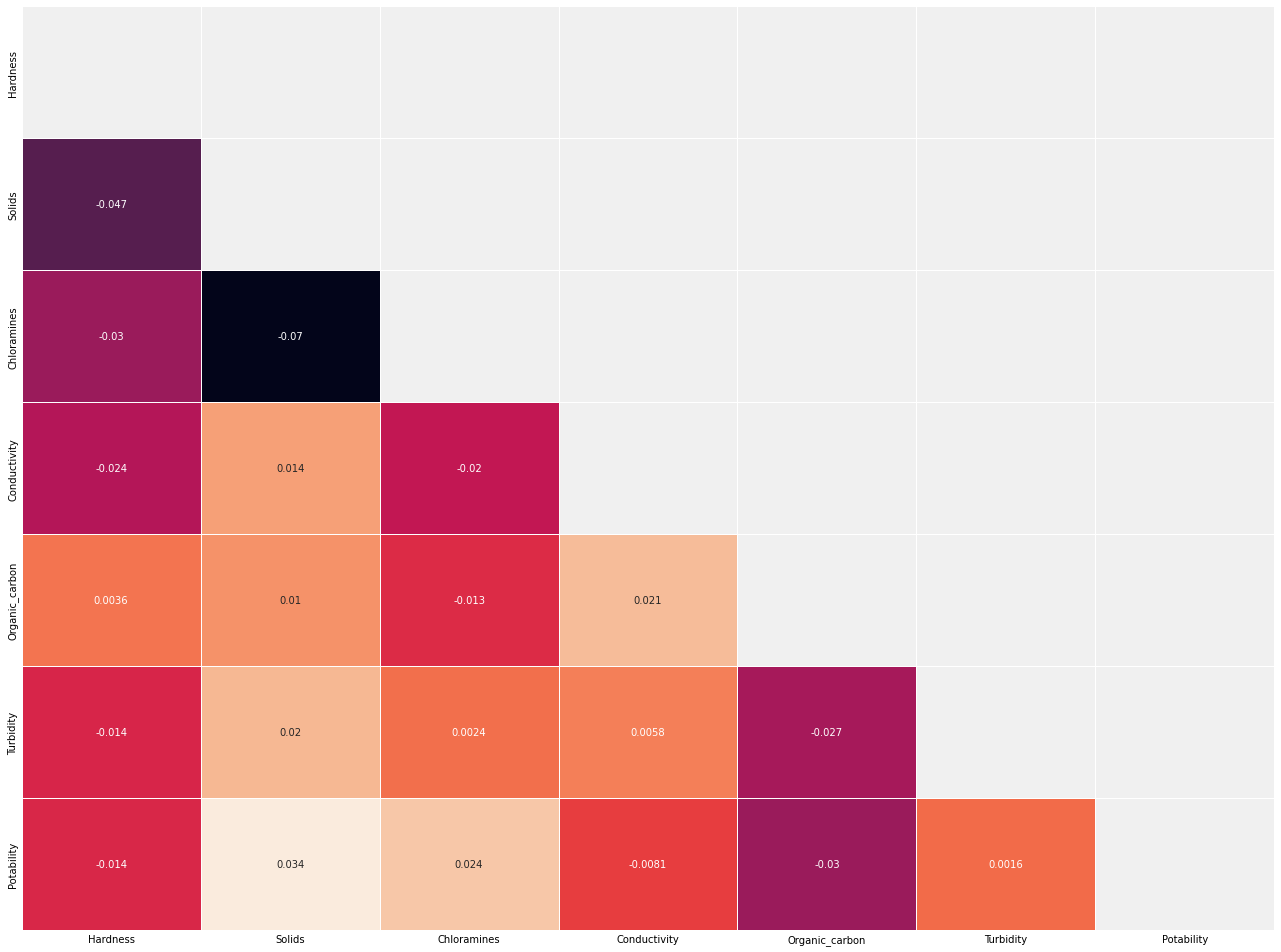

In [162]:
plt.figure(figsize=(20, 17))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket",cbar=False);

There are no correlated columns present in the data

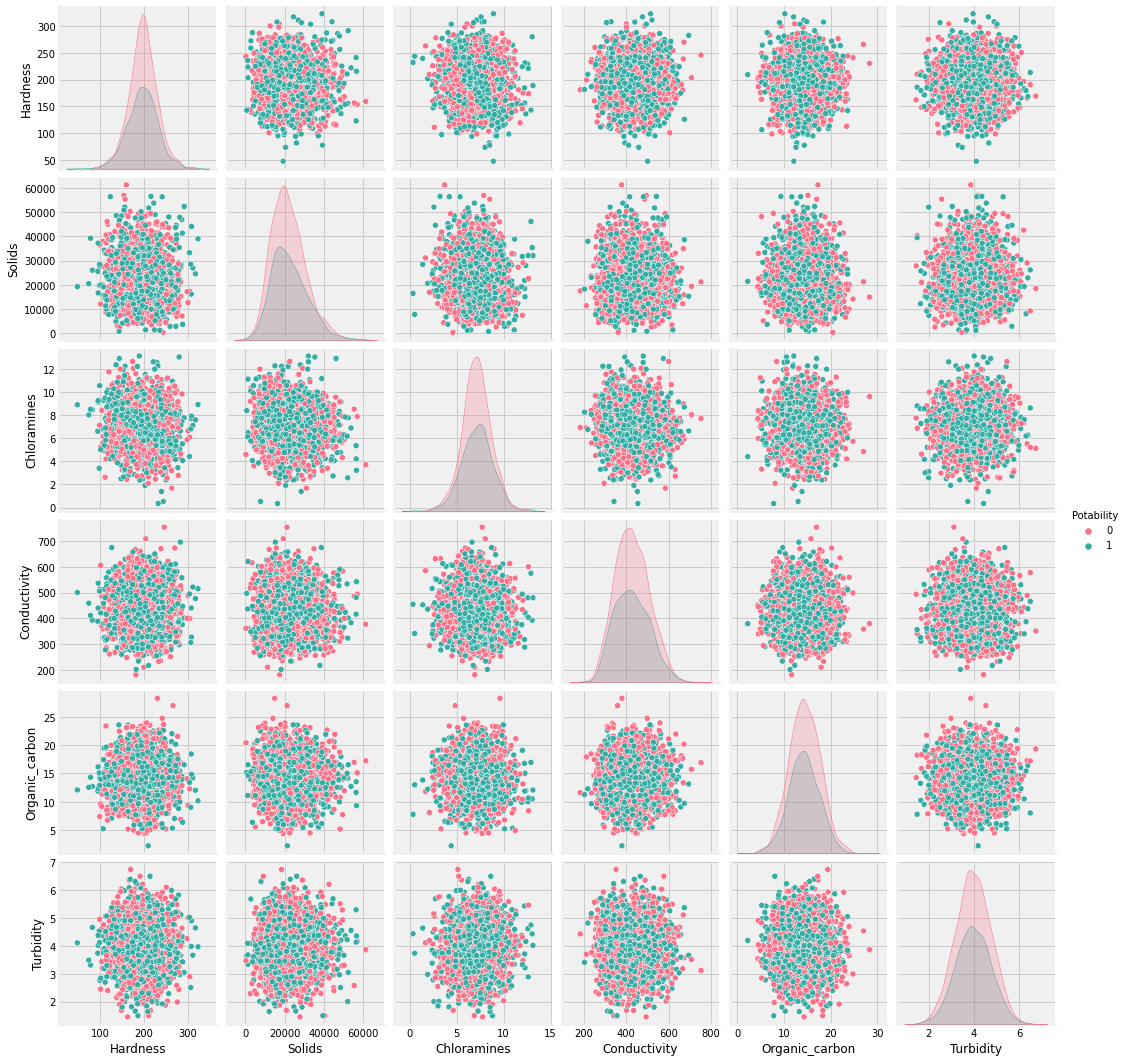

In [163]:
sns.pairplot(data, hue="Potability", palette="husl");

# Hardness

In [164]:
data['Hardness'].describe()

count    3276.000000
mean      196.369496
std        32.879761
min        47.432000
25%       176.850538
50%       196.967627
75%       216.667456
max       323.124000
Name: Hardness, dtype: float64

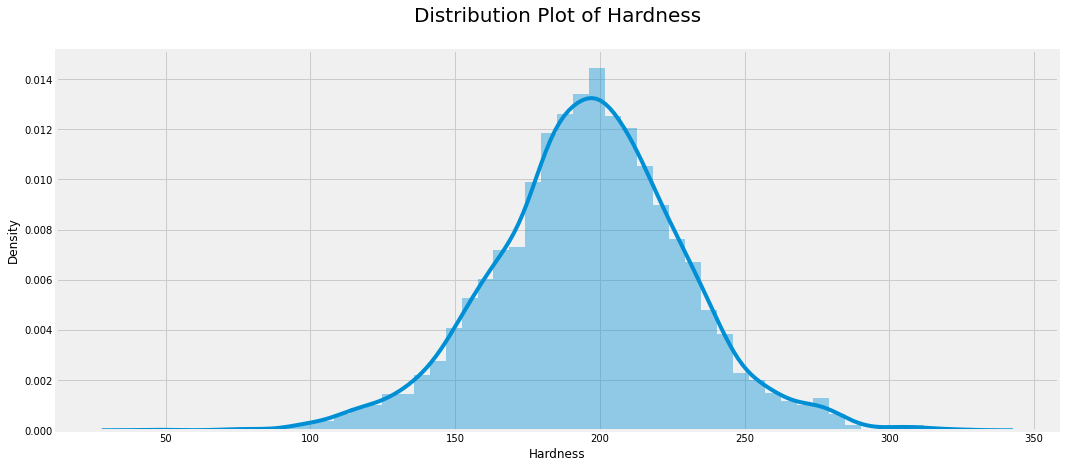

In [165]:
plt.figure(figsize = (16, 7))
sns.distplot(data['Hardness'])
plt.title('Distribution Plot of Hardness\n', fontsize =  20)
plt.show()

In [166]:
# basic scatter plot
fig = px.scatter(data,range(data['Hardness'].count()), sorted(data['Hardness']),
                 color=data['Potability'],
                 labels={
                     'x': "Count",
                     'y': "Hardness",
                     'color':'Potability'
                     
                 }, template = 'plotly_dark')
fig.update_layout(title='Hardness wrt Potability')
fig.show()

In [167]:
px.histogram(data_frame = data, x = 'Hardness', nbins = 10, color = 'Potability', marginal = 'box',
             template = 'plotly_dark')

# Solids

In [168]:
data['Solids'].describe()

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

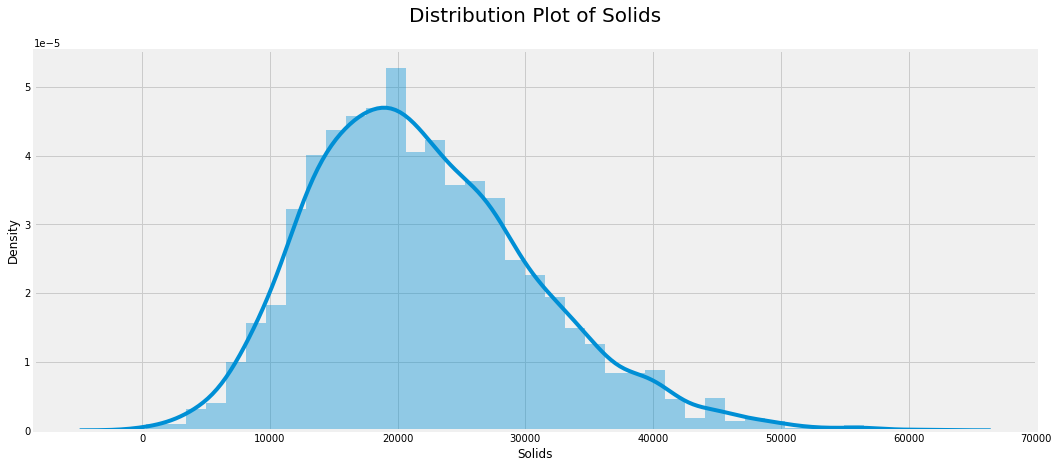

In [169]:
plt.figure(figsize = (16, 7))
sns.distplot(data['Solids'])
plt.title('Distribution Plot of Solids\n', fontsize =  20)
plt.show()

In [170]:
fig = px.scatter(data, sorted(data["Solids"]), range(data["Solids"].count()), color="Potability", facet_col="Potability", 
                 facet_row="Potability")
fig.show()

In [171]:
px.histogram(data_frame = data, x = 'Solids', nbins = 10, color = 'Potability', marginal = 'box',
             template = 'plotly_dark')

In [172]:
# basic scatter plot
fig = px.scatter(data,range(data['Solids'].count()), sorted(data['Solids']),
                 color=data['Potability'],
                 labels={
                     'x': "Count",
                     'y': "Hardness",
                     'color':'Potability'
                     
                 },
                 color_continuous_scale=px.colors.sequential.tempo,
                 template = 'plotly_dark')
fig.update_layout(title='Hardness wrt Potability')
fig.show()

# Chloramines

In [173]:
data['Chloramines'].describe()

count    3276.000000
mean        7.122277
std         1.583085
min         0.352000
25%         6.127421
50%         7.130299
75%         8.114887
max        13.127000
Name: Chloramines, dtype: float64

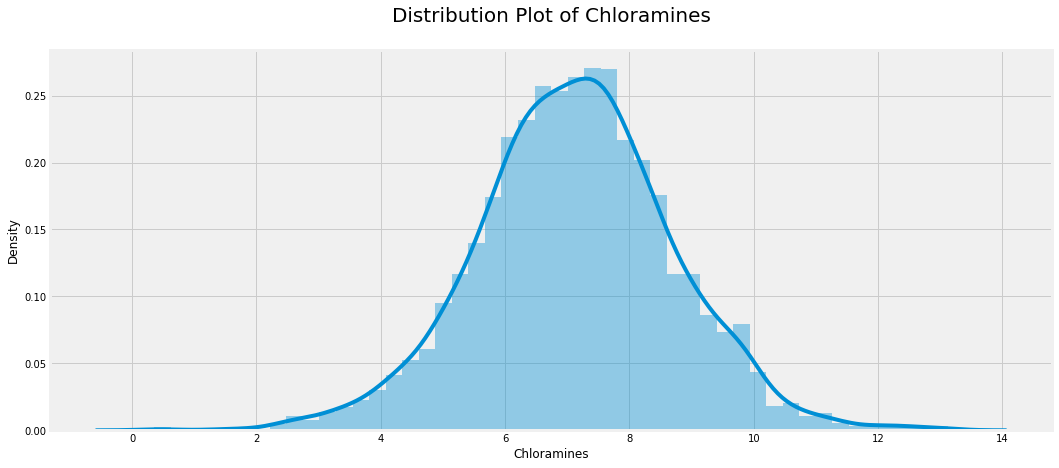

In [174]:
plt.figure(figsize = (16, 7))
sns.distplot(data['Chloramines'])
plt.title('Distribution Plot of Chloramines\n', fontsize =  20)
plt.show()

In [175]:
fig = px.line(x=range(data['Chloramines'].count()), y=sorted(data['Chloramines']),color=data['Potability'], labels={
                     'x': "Count",
                     'y': "Chloramines",
                     'color':'Potability'
                     
                 }, template = 'plotly_dark')
fig.update_layout(title='Chloramines wrt Potability')
fig.show()

In [176]:
fig = px.box(x = 'Chloramines', data_frame = data, template = 'plotly_dark')
fig.update_layout(title='Chloramines')
fig.show()

# Conductivity

In [177]:
data["Conductivity"].describe()

count    3276.000000
mean      426.205111
std        80.824064
min       181.483754
25%       365.734414
50%       421.884968
75%       481.792304
max       753.342620
Name: Conductivity, dtype: float64

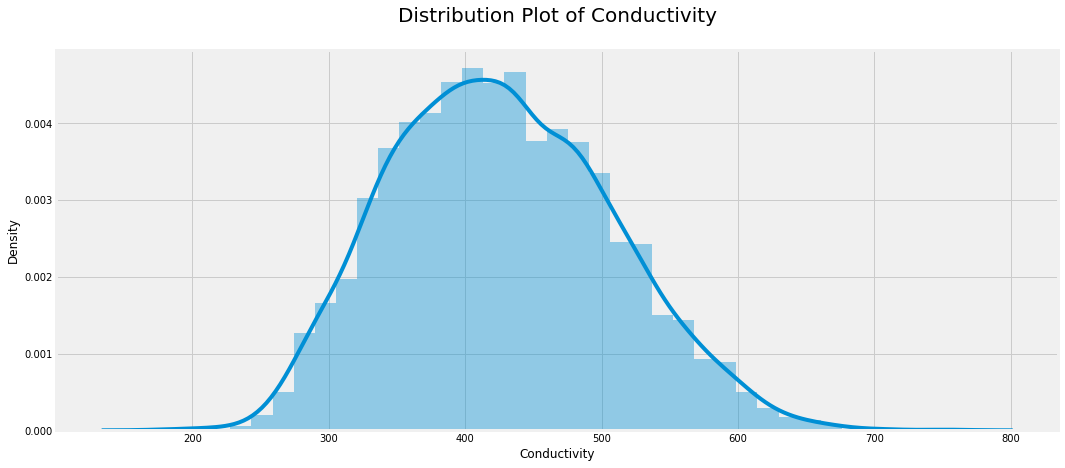

In [178]:
plt.figure(figsize = (16, 7))
sns.distplot(data['Conductivity'])
plt.title('Distribution Plot of Conductivity\n', fontsize =  20)
plt.show()

In [179]:
fig = px.bar(data, x=range(data['Conductivity'].count()),
             y=sorted(data['Conductivity']), labels={
                     'x': "Count",
                     'y': "Conductivity",
                     'color':'Potability'
                     
                 },
             color=data['Potability']
             ,template = 'plotly_dark')
fig.update_layout(title='Conductivity wrt Potability')
fig.show() 

In [180]:

group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot([data['Conductivity']], group_labels)
fig.show()

# Organic_carbon

In [181]:
data['Organic_carbon'].describe()

count    3276.000000
mean       14.284970
std         3.308162
min         2.200000
25%        12.065801
50%        14.218338
75%        16.557652
max        28.300000
Name: Organic_carbon, dtype: float64

In [182]:

group_labels = ['Organic_carbon'] # name of the dataset

fig = ff.create_distplot([data['Organic_carbon']], group_labels)
fig.show()

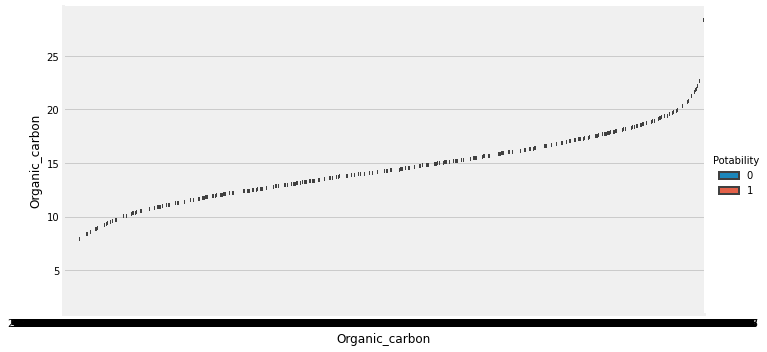

In [183]:
sns.catplot(x = 'Organic_carbon', y = 'Organic_carbon', hue = 'Potability', data = data, kind = 'box',
            height = 5, aspect = 2)
plt.show()

# Turbidity

In [184]:
data['Turbidity'].describe()

count    3276.000000
mean        3.966786
std         0.780382
min         1.450000
25%         3.439711
50%         3.955028
75%         4.500320
max         6.739000
Name: Turbidity, dtype: float64

In [185]:

group_labels = ['Turbidity'] # name of the dataset

fig = ff.create_distplot([data['Turbidity']], group_labels)
fig.show()

In [186]:
data['turbid_class']=data['Turbidity'].astype(int)

In [187]:
data['turbid_class'].unique()

array([2, 4, 3, 5, 6, 1])

In [188]:
px.scatter(data_frame = data, x = 'Turbidity', y = 'turbid_class', color = 'Potability', template = 'plotly_dark')

In [189]:
fig = px.pie(data,
             values=data['turbid_class'].value_counts(), 
             names=data['turbid_class'].value_counts().keys(),
            )
fig.update_layout(
    title='turbid_class',
    template = 'plotly_dark'
)
fig.show()

In [190]:
data=data.drop(['turbid_class'],axis=1)

# Potability

In [191]:
data['Potability'].describe()

count    3276.000000
mean        0.390110
std         0.487849
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Potability, dtype: float64

In [192]:
px.histogram(data_frame = data, x = 'Potability', color = 'Potability', marginal = 'box',
             template = 'plotly_dark')

In [193]:
fig = px.pie(data,
             values=data['Potability'].value_counts(), 
             names=data['Potability'].value_counts().keys(),
            )
fig.update_layout(
    title='Potability',
    template = 'plotly_dark'
)
fig.show()

# Data Preprocessing

In [194]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [195]:
X=data.drop(['Potability'],axis=1)
y=data['Potability']

Since the data is not in a uniform shape, we scale the data using standard scalar

In [196]:
scaler = StandardScaler()
x=scaler.fit_transform(X)

In [197]:
# split the data to train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.85,random_state=42)


print("training data shape:-{} labels{} ".format(x_train.shape,y_train.shape))
print("testing data shape:-{} labels{} ".format(x_test.shape,y_test.shape))

training data shape:-(2784, 6) labels(2784,) 
testing data shape:-(492, 6) labels(492,) 


# Modeling

### K Nearest Neighbours

In [198]:
from sklearn.neighbors import KNeighborsClassifier

In [199]:
knn = KNeighborsClassifier(n_neighbors=2)
# Train the model using the training sets
knn.fit(x_train,y_train)

#Predict Output
predicted= knn.predict(x_test) # 0:Overcast, 2:Mild


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


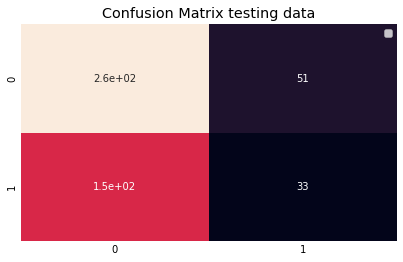

In [200]:
#  Confusion matrix
from sklearn.metrics import confusion_matrix
# Make Predictions
pred1=knn.predict(np.array(x_test))
plt.title("Confusion Matrix testing data")
sns.heatmap(confusion_matrix(y_test,pred1),annot=True,cbar=False)
plt.legend()
plt.show()

### Decision Tree

In [201]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [202]:
tre = tree.DecisionTreeClassifier()
tre = tre.fit(x_train, y_train)

y_pred = tre.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.5711382113821138


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


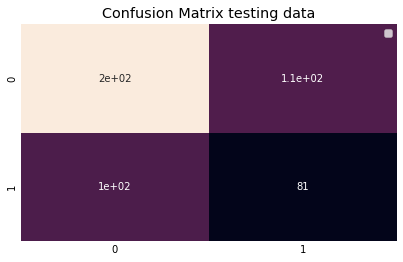

In [203]:
#  Confusion matrix
from sklearn.metrics import confusion_matrix
# Make Predictions
pred1=tre.predict(np.array(x_test))
plt.title("Confusion Matrix testing data")
sns.heatmap(confusion_matrix(y_test,pred1),annot=True,cbar=False)
plt.legend()
plt.show()

### Random Forest

In [204]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [205]:
# create the model
model_rf = RandomForestClassifier(n_estimators=500, oob_score=True, random_state=100)


# fitting the model
model_rf=model_rf.fit(x_train, y_train) 

y_pred = model_rf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.6300813008130082


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


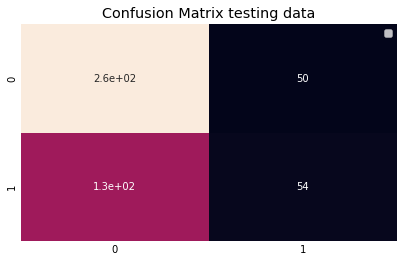

In [206]:
#  Confusion matrix
from sklearn.metrics import confusion_matrix
# Make Predictions
pred1=model_rf.predict(np.array(x_test))
plt.title("Confusion Matrix testing data")
sns.heatmap(confusion_matrix(y_test,pred1),annot=True,cbar=False)
plt.legend()
plt.show()